# Problem 1

In [59]:
from sklearn.datasets import load_iris
import pandas as pd

# Iris 데이터셋 로드 (a)
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# 메타데이터 출력 (설명) (b)
print(iris.DESCR)

# 변수 정보 출력 (b)
# 여기서는 각 특성(변수)의 기술통계를 출력합니다.
print(iris_df.describe())


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [60]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Iris 데이터셋 로드 (c)
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# 특성(features)과 타겟(target) 분리
X = iris_df.drop('target', axis=1)  # 특성
y = iris_df['target']  # 타겟

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분할된 데이터셋의 크기 확인
print(f"훈련 세트 크기: {X_train.shape[0]}, 테스트 세트 크기: {X_test.shape[0]}")

훈련 세트 크기: 120, 테스트 세트 크기: 30


In [61]:
# 훈련 세트의 기술통계 출력 (d)
descriptive_stats = X_train.describe()

# 출력
print(descriptive_stats)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         120.000000        120.000000         120.000000   
mean            5.809167          3.061667           3.726667   
std             0.823805          0.449123           1.752345   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.500000   
50%             5.750000          3.000000           4.250000   
75%             6.400000          3.400000           5.100000   
max             7.700000          4.400000           6.700000   

       petal width (cm)  
count        120.000000  
mean           1.183333  
std            0.752289  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


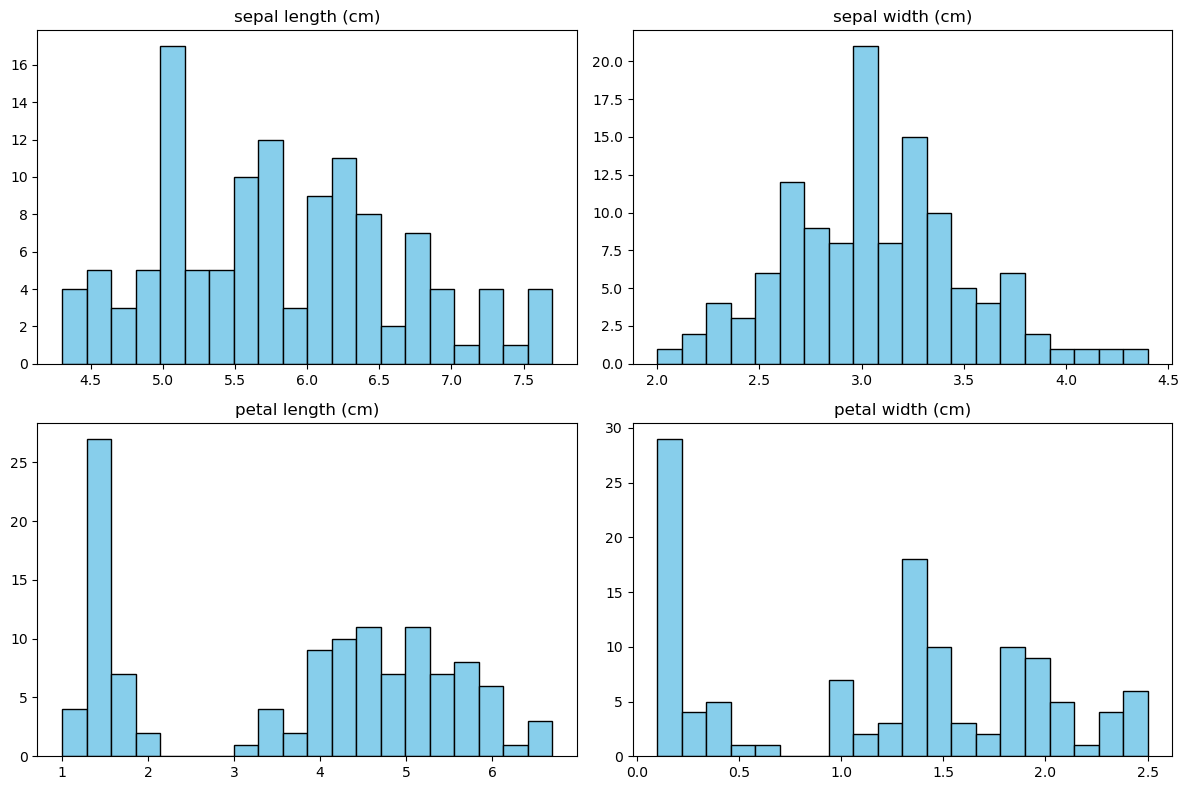

In [62]:
import matplotlib.pyplot as plt

# 문제 (e) 해결을 위한 코드: Iris 훈련 세트 변수의 히스토그램을 2x2 포맷으로 시각화
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

for i, col in enumerate(X_train.columns):
    axs[i].hist(X_train[col], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [63]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성 (f)
scaler = StandardScaler()

# 훈련 데이터에 대한 표준화 적용
X_train_scaled = scaler.fit_transform(X_train)

# 표준화된 데이터를 DataFrame으로 변환 (선택적)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# 결과 확인
print(X_train_scaled_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -1.473937          1.203658          -1.562535         -1.312603
1          -0.133071          2.992376          -1.276006         -1.045633
2           1.085898          0.085709           0.385858          0.289218
3          -1.230143          0.756479          -1.218701         -1.312603
4          -1.717731          0.309299          -1.390618         -1.312603


In [64]:
# 테스트 데이터에 대한 표준화 적용 (g)
# 앞서 생성한 StandardScaler 객체인 scaler를 사용
X_test_scaled = scaler.transform(X_test)

# 표준화된 데이터를 DataFrame으로 변환 (선택적)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 결과 확인
print(X_test_scaled_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.354517         -0.585060           0.557775          0.022248
1          -0.133071          1.650837          -1.161395         -1.179118
2           2.304867         -1.032239           1.818500          1.490583
3           0.232620         -0.361470           0.443164          0.422703
4           1.207795         -0.585060           0.615081          0.289218


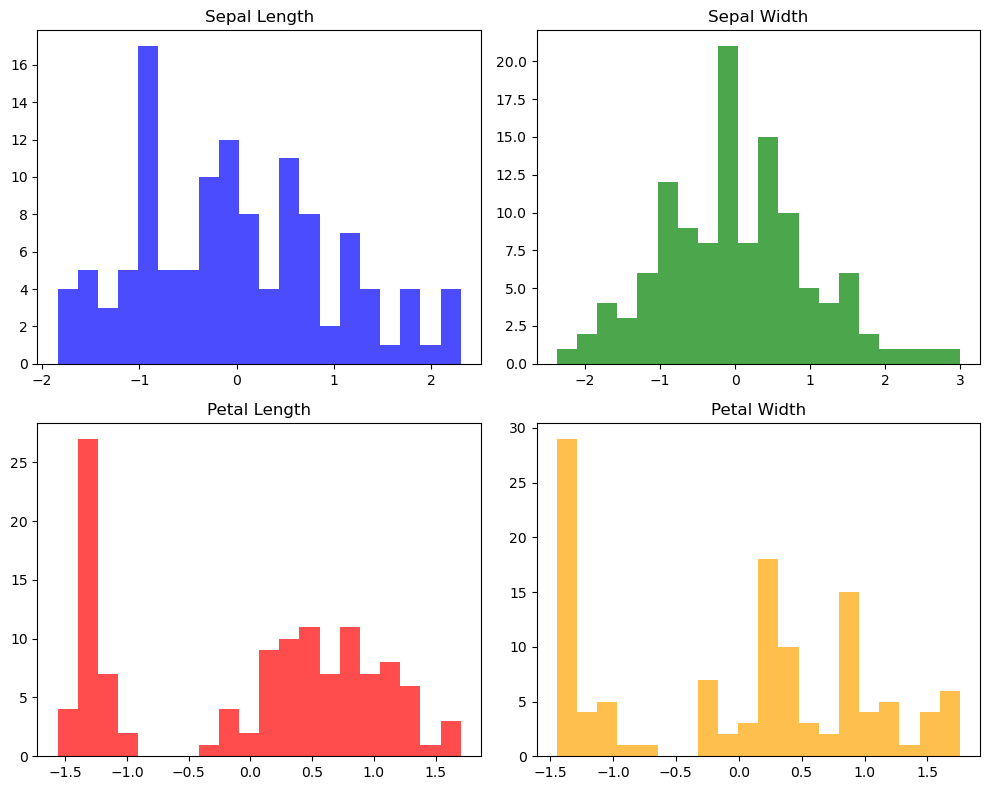

In [65]:
import matplotlib.pyplot as plt

# 표준화된 훈련 세트 변수를 사용하여 2x2 형식으로 4개의 히스토그램 그리기
plt.figure(figsize=(10, 8))

# 히스토그램 1 (상단 좌측)
plt.subplot(2, 2, 1)
plt.hist(X_train_scaled[:, 0], bins=20, color='blue', alpha=0.7)
plt.title('Sepal Length')

# 히스토그램 2 (상단 우측)
plt.subplot(2, 2, 2)
plt.hist(X_train_scaled[:, 1], bins=20, color='green', alpha=0.7)
plt.title('Sepal Width')

# 히스토그램 3 (하단 좌측)
plt.subplot(2, 2, 3)
plt.hist(X_train_scaled[:, 2], bins=20, color='red', alpha=0.7)
plt.title('Petal Length')

# 히스토그램 4 (하단 우측)
plt.subplot(2, 2, 4)
plt.hist(X_train_scaled[:, 3], bins=20, color='orange', alpha=0.7)
plt.title('Petal Width')

plt.tight_layout()
plt.show()

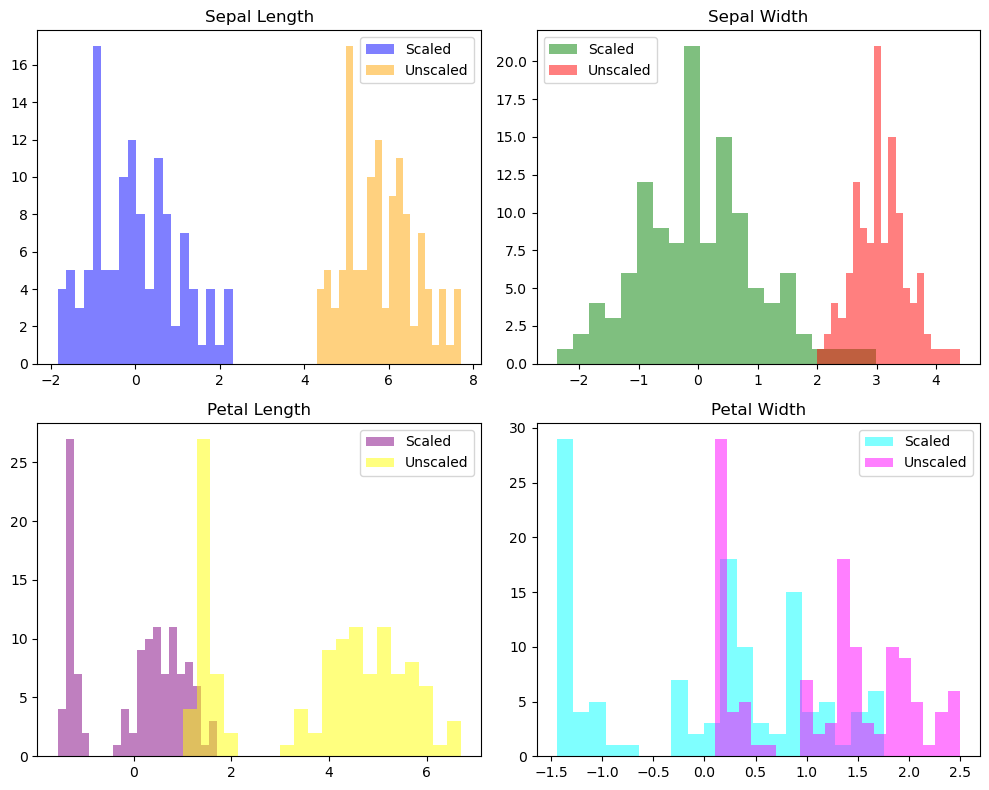

In [66]:
import matplotlib.pyplot as plt

# 2x2 형식으로 4개의 그래프를 그리기 위한 그림 준비
plt.figure(figsize=(10, 8))

# 히스토그램 1 (상단 좌측) - Sepal Length
plt.subplot(2, 2, 1)
plt.hist(X_train_scaled[:, 0], bins=20, color='blue', alpha=0.5, label='Scaled')
plt.hist(X_train.iloc[:, 0], bins=20, color='orange', alpha=0.5, label='Unscaled')
plt.title('Sepal Length')
plt.legend()

# 히스토그램 2 (상단 우측) - Sepal Width
plt.subplot(2, 2, 2)
plt.hist(X_train_scaled[:, 1], bins=20, color='green', alpha=0.5, label='Scaled')
plt.hist(X_train.iloc[:, 1], bins=20, color='red', alpha=0.5, label='Unscaled')
plt.title('Sepal Width')
plt.legend()

# 히스토그램 3 (하단 좌측) - Petal Length
plt.subplot(2, 2, 3)
plt.hist(X_train_scaled[:, 2], bins=20, color='purple', alpha=0.5, label='Scaled')
plt.hist(X_train.iloc[:, 2], bins=20, color='yellow', alpha=0.5, label='Unscaled')
plt.title('Petal Length')
plt.legend()

# 히스토그램 4 (하단 우측) - Petal Width
plt.subplot(2, 2, 4)
plt.hist(X_train_scaled[:, 3], bins=20, color='cyan', alpha=0.5, label='Scaled')
plt.hist(X_train.iloc[:, 3], bins=20, color='magenta', alpha=0.5, label='Unscaled')
plt.title('Petal Width')
plt.legend()

plt.tight_layout()
plt.show()

# Problem 2

In [67]:
import pandas as pd

# Load the car evaluation dataset
file_path = 'car.data'
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_df = pd.read_csv(file_path, names=column_names)

# Display the first few rows of the dataset
print(car_df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [68]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the data
car_df_encoded = ordinal_encoder.fit_transform(car_df[column_names[:-1]])  # Exclude 'class' column for encoding

# Convert the encoded features back to a DataFrame
car_df_encoded = pd.DataFrame(car_df_encoded, columns=column_names[:-1])
car_df_encoded['class'] = car_df['class']  # Add the target column back

# Print the first five rows with the transformed categorical variables
print("First five rows with Ordinal Encoding:")
print(car_df_encoded.head())

First five rows with Ordinal Encoding:
   buying  maint  doors  persons  lug_boot  safety  class
0     3.0    3.0    0.0      0.0       2.0     1.0  unacc
1     3.0    3.0    0.0      0.0       2.0     2.0  unacc
2     3.0    3.0    0.0      0.0       2.0     0.0  unacc
3     3.0    3.0    0.0      0.0       1.0     1.0  unacc
4     3.0    3.0    0.0      0.0       1.0     2.0  unacc


In [69]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
car_df_onehot = onehot_encoder.fit_transform(car_df[column_names[:-1]])  # Exclude 'class' column for encoding

# Since OneHotEncoder returns an array, let's convert it to DataFrame
# First, get feature names for the new columns
onehot_feature_names = onehot_encoder.get_feature_names_out(column_names[:-1])
# Create a DataFrame with the new onehot encoded features
car_df_onehot = pd.DataFrame(car_df_onehot, columns=onehot_feature_names)
car_df_onehot['class'] = car_df['class']  # Add the target column back

# Print the first five rows with the transformed categorical variables
print("First five rows with OneHot Encoding:")
print(car_df_onehot.head())

First five rows with OneHot Encoding:
   buying_high  buying_low  buying_med  buying_vhigh  maint_high  maint_low  \
0          0.0         0.0         0.0           1.0         0.0        0.0   
1          0.0         0.0         0.0           1.0         0.0        0.0   
2          0.0         0.0         0.0           1.0         0.0        0.0   
3          0.0         0.0         0.0           1.0         0.0        0.0   
4          0.0         0.0         0.0           1.0         0.0        0.0   

   maint_med  maint_vhigh  doors_2  doors_3  ...  persons_2  persons_4  \
0        0.0          1.0      1.0      0.0  ...        1.0        0.0   
1        0.0          1.0      1.0      0.0  ...        1.0        0.0   
2        0.0          1.0      1.0      0.0  ...        1.0        0.0   
3        0.0          1.0      1.0      0.0  ...        1.0        0.0   
4        0.0          1.0      1.0      0.0  ...        1.0        0.0   

   persons_more  lug_boot_big  lug_boot_me

C:\Users\hilla\miniconda3\envs\pythonProject\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
